In [86]:
from transformer_model import TransformerModel
import torch

In [130]:
filename1 = "/Users/juliushietala/junction_2020/junction-2020-gubbet-koodaa/speech_recognition/test_audio/test.mp3"
filename2 = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/up/0a7c2a8d_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filename1)

downsample_rate=16000

downsample_resample = torchaudio.transforms.Resample(
    sample_rate, downsample_rate, resampling_method='sinc_interpolation')

waveform = downsample_resample(waveform)
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0
#hamming, hanning, povey (default), rectangular, blackman
params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": True,
    "round_to_power_of_two": True,
    "sample_frequency": sample_rate,
    "num_mel_bins": 24
}
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

torch.Size([76, 24])


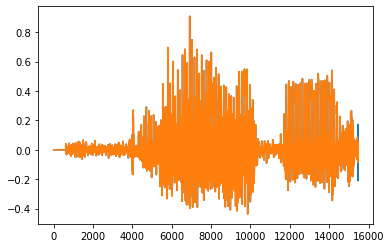

In [131]:
print(fbank.size())
plt.figure()
plt.plot(waveform.t().numpy()[:,:]);

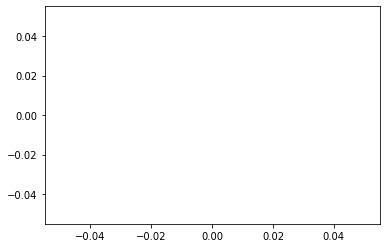

In [113]:
plt.figure()
split_form = waveform[:,30000:38000]
split_form.shape
plt.plot(split_form.numpy().T);

In [114]:
fbank = torchaudio.compliance.kaldi.fbank(split_form, **params)

AssertionError: choose a window size 400 that is [2, 0]

In [115]:
fbank.size()

torch.Size([79, 24])

In [101]:
#torchaudio.save('foo_save.wav', np_form, sample_rate) 

In [102]:
batch_size = 1
bptt = 40

ntoken_embedding = None #len(TEXT.vocab.stoi) # the size of vocabulary # AMOUNT OF COMMANDS
embedding_size = 24 # embedding dimension
nhid = 256 # the dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 6 # the number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 8 # the number of heads in the multiheadattention models
dropout = 0.2
    
model = TransformerModel(ntoken_embedding, embedding_size, nhead, nhid, nlayers, n_outputs=10, ready_embedding=True, dropout=0.2, batch_size=batch_size, bptt=40)
model.load_state_dict(torch.load("/Users/juliushietala/junction_2020/junction-2020-gubbet-koodaa/speech_recognition/transformer/best_model.mdl", map_location=torch.device('cpu')))
src_mask = model.generate_square_subsequent_mask(40)
data = torch.zeros((40,24))
data[:39,:] = fbank
data = data.view((40,1,24))
pred = model(data, src_mask)

In [103]:
print(pred)
print(torch.argmax(pred))

tensor([[ 2.0890,  5.4309,  1.2932, -2.0529,  1.4956,  2.1633,  0.7760, -1.5124,
         -2.1189,  1.2231]], grad_fn=<AddmmBackward>)
tensor(1)


In [244]:
import pandas as pd

df = pd.DataFrame(columns=['index', 'path', 'label'])
root = "/Users/juliushietala/junction_2020/tensorflow-speech-recognition-challenge/train/audio/"
ignore = ['_background_noise_', '.DS_Store' ]
desired_labels = ['up', 'down', 'left', 'right']
n = 0
labels = []
for folder in os.listdir(root):
    if not folder in ignore:
        labels.append(folder)
        noise = 0
        for file in os.listdir(root+folder):
            df = df.append({'index': n, 'path': folder+"/"+file, 'label': folder}, ignore_index=True)
            n += 1
            if not folder in desired_labels:
                print("added noise", folder, noise)
                noise +=1
            if noise > 100:
                noise = 0
                break
            


added noise eight 0
added noise eight 1
added noise eight 2
added noise eight 3
added noise eight 4
added noise eight 5
added noise eight 6
added noise eight 7
added noise eight 8
added noise eight 9
added noise eight 10
added noise eight 11
added noise eight 12
added noise eight 13
added noise eight 14
added noise eight 15
added noise eight 16
added noise eight 17
added noise eight 18
added noise eight 19
added noise eight 20
added noise eight 21
added noise eight 22
added noise eight 23
added noise eight 24
added noise eight 25
added noise eight 26
added noise eight 27
added noise eight 28
added noise eight 29
added noise eight 30
added noise eight 31
added noise eight 32
added noise eight 33
added noise eight 34
added noise eight 35
added noise eight 36
added noise eight 37
added noise eight 38
added noise eight 39
added noise eight 40
added noise eight 41
added noise eight 42
added noise eight 43
added noise eight 44
added noise eight 45
added noise eight 46
added noise eight 47
ad

added noise happy 72
added noise happy 73
added noise happy 74
added noise happy 75
added noise happy 76
added noise happy 77
added noise happy 78
added noise happy 79
added noise happy 80
added noise happy 81
added noise happy 82
added noise happy 83
added noise happy 84
added noise happy 85
added noise happy 86
added noise happy 87
added noise happy 88
added noise happy 89
added noise happy 90
added noise happy 91
added noise happy 92
added noise happy 93
added noise happy 94
added noise happy 95
added noise happy 96
added noise happy 97
added noise happy 98
added noise happy 99
added noise happy 100
added noise go 0
added noise go 1
added noise go 2
added noise go 3
added noise go 4
added noise go 5
added noise go 6
added noise go 7
added noise go 8
added noise go 9
added noise go 10
added noise go 11
added noise go 12
added noise go 13
added noise go 14
added noise go 15
added noise go 16
added noise go 17
added noise go 18
added noise go 19
added noise go 20
added noise go 21
adde

added noise nine 61
added noise nine 62
added noise nine 63
added noise nine 64
added noise nine 65
added noise nine 66
added noise nine 67
added noise nine 68
added noise nine 69
added noise nine 70
added noise nine 71
added noise nine 72
added noise nine 73
added noise nine 74
added noise nine 75
added noise nine 76
added noise nine 77
added noise nine 78
added noise nine 79
added noise nine 80
added noise nine 81
added noise nine 82
added noise nine 83
added noise nine 84
added noise nine 85
added noise nine 86
added noise nine 87
added noise nine 88
added noise nine 89
added noise nine 90
added noise nine 91
added noise nine 92
added noise nine 93
added noise nine 94
added noise nine 95
added noise nine 96
added noise nine 97
added noise nine 98
added noise nine 99
added noise nine 100
added noise stop 0
added noise stop 1
added noise stop 2
added noise stop 3
added noise stop 4
added noise stop 5
added noise stop 6
added noise stop 7
added noise stop 8
added noise stop 9
added noi

added noise bird 4
added noise bird 5
added noise bird 6
added noise bird 7
added noise bird 8
added noise bird 9
added noise bird 10
added noise bird 11
added noise bird 12
added noise bird 13
added noise bird 14
added noise bird 15
added noise bird 16
added noise bird 17
added noise bird 18
added noise bird 19
added noise bird 20
added noise bird 21
added noise bird 22
added noise bird 23
added noise bird 24
added noise bird 25
added noise bird 26
added noise bird 27
added noise bird 28
added noise bird 29
added noise bird 30
added noise bird 31
added noise bird 32
added noise bird 33
added noise bird 34
added noise bird 35
added noise bird 36
added noise bird 37
added noise bird 38
added noise bird 39
added noise bird 40
added noise bird 41
added noise bird 42
added noise bird 43
added noise bird 44
added noise bird 45
added noise bird 46
added noise bird 47
added noise bird 48
added noise bird 49
added noise bird 50
added noise bird 51
added noise bird 52
added noise bird 53
added 

added noise two 18
added noise two 19
added noise two 20
added noise two 21
added noise two 22
added noise two 23
added noise two 24
added noise two 25
added noise two 26
added noise two 27
added noise two 28
added noise two 29
added noise two 30
added noise two 31
added noise two 32
added noise two 33
added noise two 34
added noise two 35
added noise two 36
added noise two 37
added noise two 38
added noise two 39
added noise two 40
added noise two 41
added noise two 42
added noise two 43
added noise two 44
added noise two 45
added noise two 46
added noise two 47
added noise two 48
added noise two 49
added noise two 50
added noise two 51
added noise two 52
added noise two 53
added noise two 54
added noise two 55
added noise two 56
added noise two 57
added noise two 58
added noise two 59
added noise two 60
added noise two 61
added noise two 62
added noise two 63
added noise two 64
added noise two 65
added noise two 66
added noise two 67
added noise two 68
added noise two 69
added noise 

added noise on 74
added noise on 75
added noise on 76
added noise on 77
added noise on 78
added noise on 79
added noise on 80
added noise on 81
added noise on 82
added noise on 83
added noise on 84
added noise on 85
added noise on 86
added noise on 87
added noise on 88
added noise on 89
added noise on 90
added noise on 91
added noise on 92
added noise on 93
added noise on 94
added noise on 95
added noise on 96
added noise on 97
added noise on 98
added noise on 99
added noise on 100
added noise five 0
added noise five 1
added noise five 2
added noise five 3
added noise five 4
added noise five 5
added noise five 6
added noise five 7
added noise five 8
added noise five 9
added noise five 10
added noise five 11
added noise five 12
added noise five 13
added noise five 14
added noise five 15
added noise five 16
added noise five 17
added noise five 18
added noise five 19
added noise five 20
added noise five 21
added noise five 22
added noise five 23
added noise five 24
added noise five 25
add

In [245]:
df.head(-1)

,index,path,label
0,0,right/988e2f9a_nohash_0.wav,right
1,1,right/1eddce1d_nohash_3.wav,right
2,2,right/93ec8b84_nohash_0.wav,right
3,3,right/6272b231_nohash_1.wav,right
4,4,right/439c84f4_nohash_1.wav,right
...,...,...,...
12074,12074,four/4cb874bb_nohash_0.wav,four
12075,12075,four/9f22307d_nohash_0.wav,four
12076,12076,four/b087aa0e_nohash_0.wav,four
12077,12077,four/ae04cdbe_nohash_1.wav,four


In [246]:
df.to_csv("reduced_data_100noise.csv")